# MNIST Classification using Multilayer Perceptron

&copy; Jonathan Kristanto - April 2021

One of your assignments is to implement a backpropagation algorithm on a **simple MLP architecture**. Now, based on that simple BPNN architecture, develop a new model of BPNN capable of tackling a general digit recognition task. Once again, please employ digit datasets taken from sklearn import datasets and split into training (80%) and validation (20%) datasets. Since the size of the sample image is 8 x 8 pixels, so the
architecture of your new BPNN model has to be adjusted accordingly. Your python notebook must include the computation of 

(A) **training accuracy and validation accuracy curves**, and 

(B) **performance analysis of the model based on the associated confusion matrix**

## Import Libraries

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import plot_confusion_matrix

## Import Dataset

In [3]:
from sklearn import datasets
digits = datasets.load_digits()

In [4]:
X = digits['images']
y = digits['target']
target_names = digits['target_names']

In [5]:
print(f'Images (x) Shape : {X.shape}')
print(f'Target (y) Shape : {y.shape}')

Images (x) Shape : (1797, 8, 8)
Target (y) Shape : (1797,)


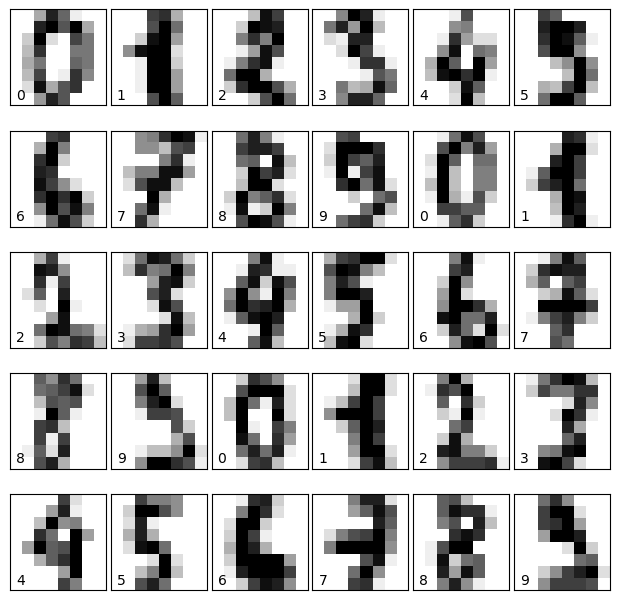

In [6]:
# Display sample data
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(30):
    ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y[i]))

## Preprocess

In [7]:
n_samples = len(X)
X = X.reshape((n_samples, -1))
print(f"After reshape = {X.shape}")

After reshape = (1797, 64)


Split dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


## Train model

In [9]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [11]:
#clf = MLPClassifier(hidden_layer_sizes=(32, 16), activation = 'identity', solver='sgd', alpha=0.2, batch_size=32)
clf = MLPClassifier(
    hidden_layer_sizes=[100, 100],
    alpha=0.0,
    learning_rate='constant',
    learning_rate_init=0.001,
    verbose=True,
    momentum=1.0
)
clf.fit(X_train, y_train)
print(f'Train Accuracy = {clf.score(X_train, y_train)}')
print(f'Test Accuracy = {clf.score(X_test, y_test)}')

Iteration 1, loss = 4.60589716
Iteration 2, loss = 1.79344473
Iteration 3, loss = 0.89506183
Iteration 4, loss = 0.50192552
Iteration 5, loss = 0.33797389
Iteration 6, loss = 0.23896081
Iteration 7, loss = 0.18839401
Iteration 8, loss = 0.15484936
Iteration 9, loss = 0.12764973
Iteration 10, loss = 0.11071509
Iteration 11, loss = 0.09489228
Iteration 12, loss = 0.08577913
Iteration 13, loss = 0.07329100
Iteration 14, loss = 0.06590161
Iteration 15, loss = 0.05828686
Iteration 16, loss = 0.05440548
Iteration 17, loss = 0.04877336
Iteration 18, loss = 0.04433683
Iteration 19, loss = 0.03914719
Iteration 20, loss = 0.03672769
Iteration 21, loss = 0.03299312
Iteration 22, loss = 0.03025905
Iteration 23, loss = 0.02825537
Iteration 24, loss = 0.02513223
Iteration 25, loss = 0.02249061
Iteration 26, loss = 0.02084056
Iteration 27, loss = 0.01945791
Iteration 28, loss = 0.01795208
Iteration 29, loss = 0.01698005
Iteration 30, loss = 0.01533713
Iteration 31, loss = 0.01435437
Iteration 32, los

### Model Summary

In [ ]:
print("Weights\n", clf.coefs_)

In [ ]:
print("Total Iteration done : ", clf.n_iter_)
print("Number of layer : ", clf.n_layers_)
print("Number of output : ", clf.n_outputs_)

## A. Training accuracy and validation accuracy curves

#### Function to plot training & validation accuracy curves

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(8, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

### Generate Training accuracy & Validation accuracy curves

In [ ]:
title = "Learning Curves (Multiple Layer Perceptron)"

# Cross validation with 5 iterations each time with 20% data 
# randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = MLPClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()

## B. Performance analysis of the model based on the associated confusion matrix

In [ ]:
fig = plot_confusion_matrix(clf, X_test, y_test, labels=target_names)
fig.figure_.suptitle("Confusion Matrix for Digit Handwritten Detection")
plt.show()

#### Extra metrics : Loss Curve

In [ ]:
plt.plot(clf.loss_curve_)

### Reference

Training & Validation accuracy curve plotting : 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html